<a href="https://www.kaggle.com/code/siddp6/simple-skip-connection?scriptVersionId=138620507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Skip Connection

## Why we need Skip Connection?

- **Hidden layers**: The hidden layers are responsible for learning and representing increasingly complex patterns and features in the data.  The purpose of hidden layers is to transform the input data into more meaningful and abstract representations that capture the underlying relationships within the data.
- Okay, so with each hidden layer help to identify more favourable pattern, so with more hidden layer means our model will be able to pick the pattern more accurately. But in actually **with more hidden layer, models start to lose accuracy**. And this phenomas is called **Vanishing gradient Problem.**
- Reason for this, it is quite easy. Deep learning model use a concept called **Backpropagation**, which means model will use some weight to run the model, then it will make prediction and cacluate the loss. Then using  backpropagation it tell previous layers to update the weight in such a way to minimze the loss using **gradients**. But this gradients will get weaker and weaker as it pass throught layer.
- **In short, During the backpropagation process, gradients get smaller and smaller as they propagate back through the layers. As a result, the early layers of the network receive very small gradients, which can cause slow or ineffective learning.**
- To solve this problem we need Skip Connection

# What is skip Connection (also known as residual connection)?
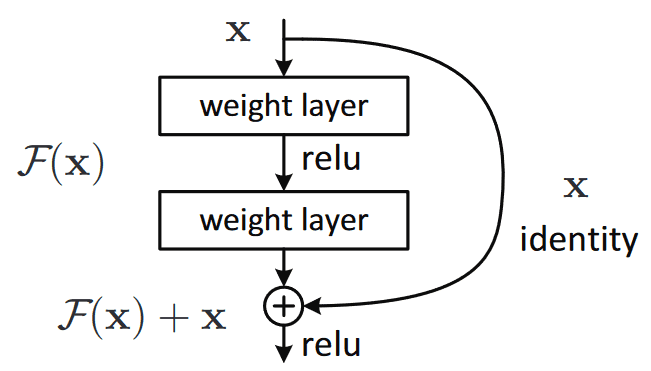

- The concept of skip connections was first introduced in the "ResNet" (Residual Network) architecture by Kaiming He et al. in their 2015 paper "Deep Residual Learning for Image Recognition." In ResNet, each layer is defined as: **Output = Activation(Layer(Input)) + Input**
- Here, the output of a layer is obtained by adding the output of a convolutional operation (with an activation function applied) to the input of the layer. By doing so, the network is encouraged to **learn residuals (differences) between the input and the desired output**, rather than directly learning the mapping. 
- When gradients are backpropagated, the direct connections provided by the skip connections allow the gradients to flow without getting severely diminished by the intermediate layers.

# Let us see the eample 
(this is very basic exmple to show now skip connection can reduce the loss when we increase the number of hidden layer)

> Go to last cell to see the analysis

# Imports

In [1]:
# my utility: https://www.kaggle.com/code/siddp6/utility
import utility

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Initalisation

In [3]:
input_size, hidden_size, output_size = 512, 128, 32
num_samples = 100000
epochs = 100
input_data = torch.rand(num_samples, input_size)
target_data = torch.rand(num_samples, output_size)
loss_normal_3, loss_normal_6 = list(), list()
loss_skip_3, loss_skip_6 = list(), list()

# Normal Model (3 layered) (without skip-connection)

In [4]:
class NormalNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(NormalNet3, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X))
        
        X = self.relu(X)
        
        return X

In [ ]:
normal_model_3 = NormalNet3(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(normal_model_3.parameters(), lr=.01)

In [ ]:
loss_normal_3 = utility.train_model(normal_model_3, epochs, input_data, target_data, criterion, optimizer, 5)

# Normal Model (7 layered) (without skip-connection)

In [ ]:
class NormalNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(NormalNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X)
        
        return X

In [ ]:
normal_model_7 = NormalNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(normal_model_7.parameters(), lr=.01)

In [ ]:
loss_normal_7 = utility.train_model(normal_model_7, epochs, input_data, target_data, criterion, optimizer, 5)

# Skip Model (3 layered) (with skip-connection)

In [ ]:
class SkipNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet3, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
        
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X))
        
        X = self.relu(X + skip_connection)
        
        return X

In [ ]:
skip_model_3 = SkipNet3(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_3.parameters(), lr=.01)

In [ ]:
loss_skip_3 = utility.train_model(skip_model_3, epochs, input_data, target_data, criterion, optimizer, 5)

# Skip Model (7 layered) (with skip-connection)

In [ ]:
class SkipNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
            
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X + skip_connection)
        
        return X

In [ ]:
skip_model_7 = SkipNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_7.parameters(), lr=.01)

In [ ]:
loss_skip_7 = utility.train_model(skip_model_7, epochs, input_data, target_data, criterion, optimizer, 5)

# Analysis

##### We can see that in normal network with 7 layer, our losses are higher than the normal network with 3 layer
##### This is not expected, because we adding more layer, so our network should perform well (low losses)

In [ ]:
utility.plot_loss({"Normal_3": loss_normal_3, "Normal_7": loss_normal_7}, epochs)

##### But  skip network with 7 layer, our losses are lower than the skip network with 3 layer. 
##### As expected, because we adding more layer, so our network should perform well (low losses)


In [ ]:
utility.plot_loss({"Skip_3": loss_skip_3, "Skip_7": loss_skip_7}, epochs)